In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display matplotlib plots inline
%matplotlib inline

In [3]:
#Load the data
df = pd.read_csv('data/Automobile_data.csv')
print("Number of rows: ", df.shape[0])
df.head()

Number of rows:  205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Data Preprocessing & Fitting a PCA model

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_columns = list(df.select_dtypes(include=['number']).columns)
df_numeric = df[numeric_columns]

# PCA is sensitive to scale. Standardize it
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled, columns = df_numeric.columns)

# Fit a PCA model to the scaled data
pca = PCA()
pca.fit(df_scaled)

PCA()

## Plot the variance ratio
### The first 3 principal components explain ~90% of the variance in the data

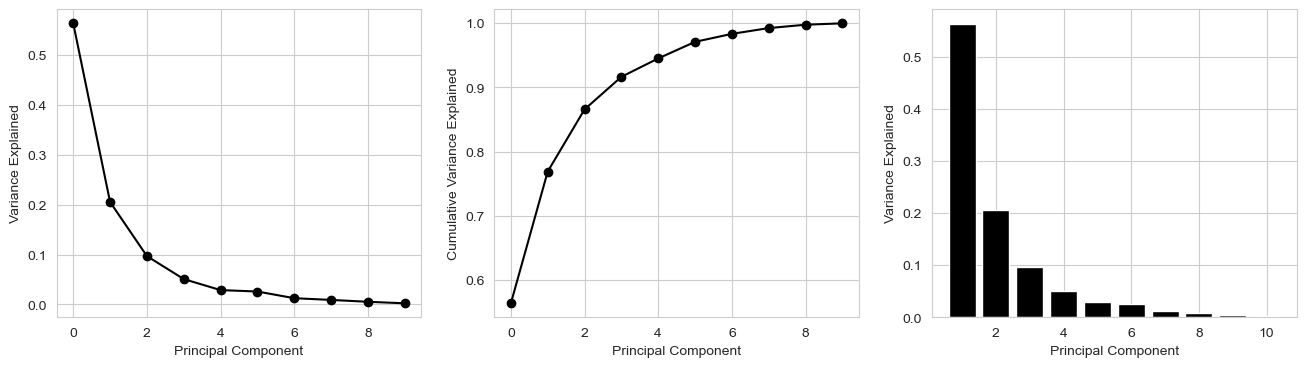

In [5]:
# Create a subplot with explained variance ratio, cumulative explained variance ratio and bar chart for variance explained by each component
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

# Plot the explained variance ratio
ax[0].plot(pca.explained_variance_ratio_, '-o', color='black')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Variance Explained')

# Plot the cumulative explained variance ratio
ax[1].plot(np.cumsum(pca.explained_variance_ratio_), '-o', color='black')
ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Cumulative Variance Explained')

# Plot the cumulative explained variance ratio
ax[2].bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='black')
ax[2].set_xlabel('Principal Component')
ax[2].set_ylabel('Variance Explained')

plt.show()

## Fit a PCA model with 3 component.

In [6]:
# Transform the data using PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['make'] = df['make']
df_pca['fuel-type'] = df['fuel-type']
df_pca['engine-type'] = df['engine-type']

# The data has been projected onto 3 principal axis
df_pca.head()

,PC1,PC2,PC3,make,fuel-type,engine-type
0,-1.283523,-2.835866,1.022796,alfa-romero,gas,dohc
1,-1.283523,-2.835866,1.022796,alfa-romero,gas,dohc
2,0.429662,-1.351623,0.022545,alfa-romero,gas,ohcv
3,-0.111933,-0.292705,0.090390,audi,gas,ohc
4,1.197674,-1.387291,-0.258406,audi,gas,ohc


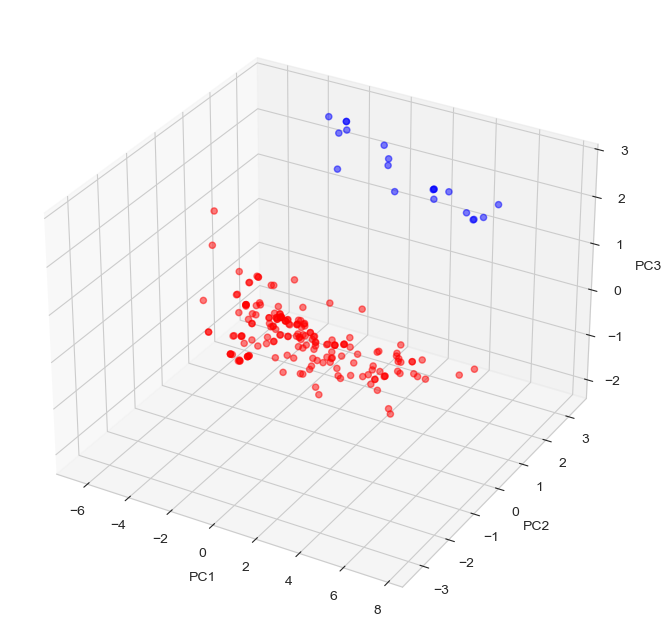

In [8]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the transformed data
ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 2], alpha=0.5, c = ['red' if x == 'gas' else 'blue' for x in df_pca['fuel-type']])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

C:\Users\chasi\ana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chasi\ana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chasi\ana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


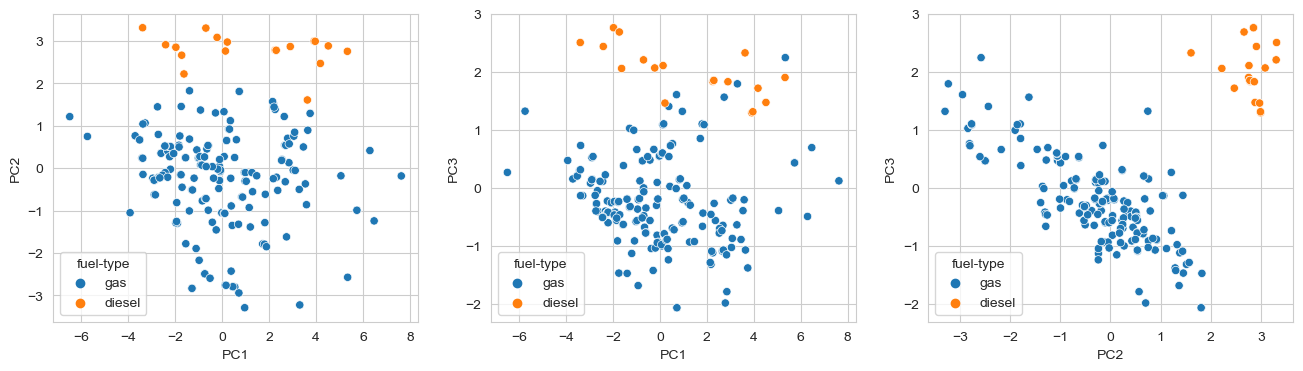

In [9]:
# 3 subplots to plot pairwise scatter plots of transformed data
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

# Plot the pairwise scatter plots
sns.scatterplot('PC1', 'PC2', data = df_pca, hue = 'fuel-type', ax=ax[0])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

sns.scatterplot('PC1', 'PC3', data = df_pca, hue = 'fuel-type', ax=ax[1])
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC3')

sns.scatterplot('PC2', 'PC3', data = df_pca, hue = 'fuel-type', ax=ax[2])
ax[2].set_xlabel('PC2')
ax[2].set_ylabel('PC3')

plt.show()

Each of the principal components is formed by linear combination of the original features.
How much each of the features contribute to each of the principal axis is given by components
A large positive value of a feature in a principal component means that the feature has a large positive correlation with the principal component i.e the feature increases as the principal component increases.

In [99]:
pd.DataFrame(pca.components_, columns= df_scaled.columns, index = ['PC-1','PC-2','PC-3'])

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
PC-1,-0.140680,0.364662,0.396589,0.380576,0.172028,0.403931,0.341940,0.035092,-0.333184,-0.350984
PC-2,-0.469382,0.262034,0.097742,0.013657,0.479489,-0.042475,-0.159152,0.459164,0.366809,0.314412
PC-3,0.434163,-0.056901,-0.006079,0.203881,-0.355157,0.165040,0.249578,0.707169,0.162618,0.156409


## Using pca libary to fit the model. This library supports  creating biplots easily

[pca] >Plotting: 50it [00:00, 496.79it/s]

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.


[pca] >Plotting: 0it [00:00, ?it/s]       

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


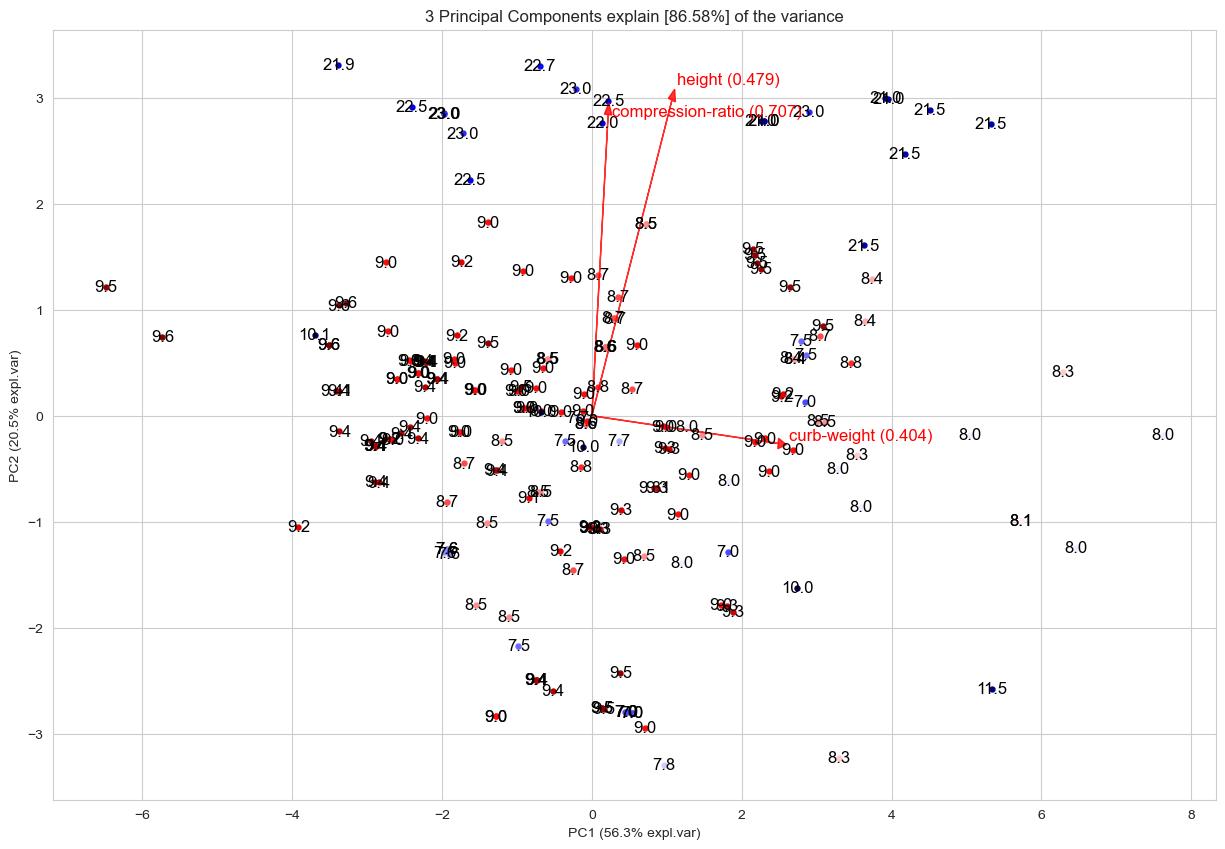

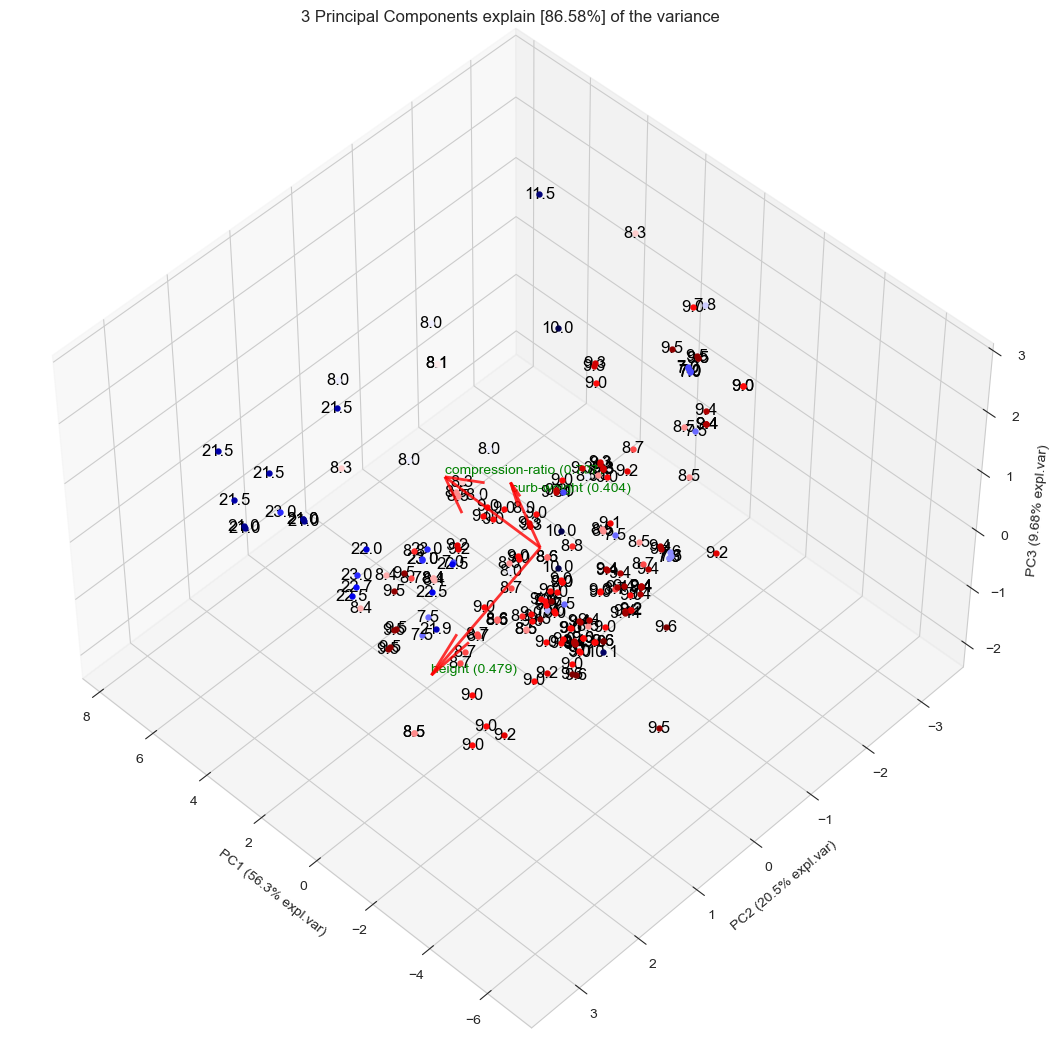

In [22]:
from pca import pca

model = pca(n_components=3, normalize=True)

results = model.fit_transform(df_numeric)

# y = df_numeric['compression-ratio'] labels the points with compression-ratio data
ax = model.biplot(y=df_numeric['compression-ratio'],legend=False, cmap='seismic', n_feat=3)
fig, ax = model.biplot3d(y = df_numeric['compression-ratio'], n_feat=3, legend=False, cmap='seismic')

### Top 3 features contributing to each of the principal components
This can be obtained in the previous section by looking at the absolute values of the components

In [23]:
model.results['topfeat']


,PC,feature,loading,type
0,PC1,curb-weight,0.403931,best
1,PC2,height,0.479489,best
2,PC3,compression-ratio,0.707169,best
3,PC2,symboling,-0.469382,weak
4,PC1,wheel-base,0.364662,weak
5,PC1,length,0.396589,weak
6,PC1,width,0.380576,weak
7,PC1,engine-size,0.341940,weak
8,PC2,city-mpg,0.366809,weak
9,PC1,highway-mpg,-0.350984,weak


### Principle components

In [56]:
pd.DataFrame(pca.components_, columns= df_subset_scaled.columns, index = ['PC-1','PC-2','PC-3'])

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
PC-1,0.358618,0.397042,0.384543,0.158682,0.409117,0.349619,0.028052,-0.345626,-0.361724
PC-2,0.293132,0.142172,0.077629,0.498113,0.010655,-0.120930,0.611103,0.380653,0.326554
PC-3,-0.155408,-0.098247,0.182402,-0.664167,0.164265,0.364051,0.553792,0.113602,0.112694
